In [385]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta

df = pd.read_csv('/Users/avaisman/tmp/DataMisc/ScheldeData/ec_schelde_all.csv')
 
#df['Date'] = pd.to_datetime(df['Date'])

# Sumar 2 años a cada fecha
#df['Date'] = df['Date'] + pd.DateOffset(years=4)
#df = df.rename(columns={'AAPL.Close': 'NbrOfUsers'})
# Mostrar el DataFrame resultante
#display(df)
    
#fig = px.histogram(df, x="Date", y="NbrOfUsers", histfunc="sum", title="Total Number of Users per Month")
#fig.update_traces(xbins_size="M1")
#fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M1", tickformat="%b\n%Y")
#fig.update_layout(bargap=0.1)
#fig.add_trace(go.Scatter(mode="markers", x=df["Date"], y=df["AAPL.Close"], name="daily"))
#fig.show()

In [362]:
df.head()

,Unnamed: 0,Timestamp,Value,Station
0,0,2022-04-01 00:00:00+00:00,1412.81,29131
1,1,2022-04-01 00:10:00+00:00,1434.60,29131
2,2,2022-04-01 00:20:00+00:00,1512.09,29131
3,3,2022-04-01 00:30:00+00:00,1535.31,29131
4,4,2022-04-01 00:40:00+00:00,1557.16,29131


In [386]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [364]:
df.head()

,Unnamed: 0,Timestamp,Value,Station
0,0,2022-04-01 00:00:00+00:00,1412.81,29131
1,1,2022-04-01 00:10:00+00:00,1434.60,29131
2,2,2022-04-01 00:20:00+00:00,1512.09,29131
3,3,2022-04-01 00:30:00+00:00,1535.31,29131
4,4,2022-04-01 00:40:00+00:00,1557.16,29131


In [387]:
import duckdb
source = duckdb.sql("""SELECT STRFTIME('%Y-%m-%d', Timestamp::DATE) AS Day, avg(\"Value\") as Salinity
                       FROM read_csv_auto('/Users/avaisman/tmp/DataMisc/ScheldeData/ec_schelde_all.csv')
                       GROUP BY 1
                       ORDER BY 1""").df()
source.head()

,Day,Salinity
0,2022-04-01,7296.637470
1,2022-04-02,7419.649154
2,2022-04-03,7533.569935
3,2022-04-04,7995.929357
4,2022-04-05,7957.965295


In [388]:
import altair as alt

In [367]:
alt.Chart(source).mark_bar(size=20).encode(
    # x='year_month:T',
    x=alt.X('Day:T', axis=alt.Axis(format='%Y-%m-%d', title='Day')),
    y='Salinity:Q',
    tooltip=[alt.Tooltip('Day:T', title='Date', format='%Y-%m-%d'), 'Salinity']
).properties(
    width=800
)

alt.Chart(...)

In [393]:
import duckdb
source = duckdb.sql( """WITH StationAvg AS (SELECT  \"Station\"   
                as Station, avg(\"Value\") as Salinity 
                FROM read_csv_auto('/Users/avaisman/tmp/DataMisc/ScheldeData/ec_schelde_all.csv')GROUP BY 1
                ORDER BY Salinity ASC)
                SELECT ROW_NUMBER() OVER(ORDER BY Salinity) as Station, Salinity FROM StationAvg """).df()
source

,Station,Salinity
0,1,900.588317
1,2,1032.872562
2,3,1763.520479
3,4,2395.726827
4,5,6603.107740
5,6,12761.963603
6,7,13795.873249
7,8,14068.217001
8,9,15872.930251


In [394]:
base=alt.Chart(source).mark_arc().encode(
    alt.Theta("Salinity:Q").stack(True),
    alt.Color("Salinity:Q").legend(title='Salinity',titleFontWeight='normal', orient='bottom' ,
                                    titleFontSize=16, labelFontWeight='normal',labelFontSize=14),
    tooltip=[alt.Tooltip('Station:N', title='Station'), 'Salinity']
)
pie = base.mark_arc(outerRadius=140)
text = base.mark_text(radius=150, size=16).encode(text="Station:N")

(pie + text).properties(
    title='Average Salinity per Station',
    width=330,
    height=330).configure_title(fontWeight='normal',fontSize=20)
    



alt.LayerChart(...)

In [395]:
alt.Chart(source, title="Average Salinity per Station").mark_bar().encode(
    x = alt.X('Station:N', axis=alt.Axis(title='Station Number',labelAngle=0)),
    y =alt.Y('Salinity:Q', axis=alt.Axis(title="Salinity"))  
).properties(
    width=350, height=300).configure_axis(
   # domain=False,
    labelFontSize=16,
    titleFontSize=18,
    labelFontWeight='normal',
    titleFontWeight='normal',
#  font='Arial')
).configure_title(fontWeight='normal',fontSize=20) 

alt.Chart(...)

In [396]:
import duckdb
source = duckdb.sql("""SELECT Timestamp, \"Value\"  as Salinity
                       FROM read_csv_auto('/Users/avaisman/tmp/DataMisc/ScheldeData/ec_schelde_all.csv')
   ORDER BY 1""").df()
source.tail()

,Timestamp,Salinity
23035,2022-04-11,5771.93
23036,2022-04-11,861.54
23037,2022-04-11,15409.40
23038,2022-04-11,793.67
23039,2022-04-11,12856.35


In [397]:
alt.Chart(source, title="Histogram of Salinity Values").mark_bar().encode(
  #  x = alt.X('Station:N', axis=alt.Axis(title='Station Number',labelAngle=0)),
 #  y =alt.Y('Salinity:Q', axis=alt.Axis(title="Salinity")) 
 alt.X("Salinity:Q", bin=True),
y='count()').properties(
    width=350, height=300).configure_axis(
   # domain=False,
    labelFontSize=16,
    titleFontSize=20,
    labelFontWeight='normal',
    titleFontWeight='normal',
#  font='Arial')
).configure_title(fontWeight='normal',fontSize=26) 

alt.Chart(...)

In [398]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [399]:
alt.Chart(source, title="Histogram of Salinity Values").mark_bar().encode(
alt.X("Salinity:Q",  bin=alt.Bin(step=1000),axis=alt.Axis(title='Salinity Intervals')),
y=alt.Y('count()', axis=alt.Axis(title="# of Records"))
    ).properties(
    width=600, height=300).configure_axis(
    labelFontSize=14,
    titleFontSize=16,
    labelFontWeight='normal',
    titleFontWeight='normal').configure_title(fontWeight='normal',fontSize=20) 

alt.Chart(...)

In [400]:
import altair as alt
from vega_datasets import data
import pandas as pd

source = data.anscombe().copy()
source['line-label'] = 'x=y'
source = pd.concat([source,source.groupby('Series').agg(x_diff=('X','diff'), y_diff=('Y','diff'))],axis=1)
source['rate'] = source.y_diff/source.x_diff
source['rate-label'] = 'line y=x'

 
source.loc[source['Series']=='I', 'Series'] = 'Dataset I'
source.loc[source['Series']=='II', 'Series'] = 'Dataset II'
source.loc[source['Series']=='III', 'Series'] = 'Dataset III'
source.loc[source['Series']=='IV', 'Series'] = 'Dataset IV'
source

,Series,X,Y,line-label,x_diff,y_diff,rate,rate-label
0,Dataset I,10,8.04,x=y,NaN,NaN,NaN,line y=x
1,Dataset I,8,6.95,x=y,-2.0,-1.09,0.545000,line y=x
2,Dataset I,13,7.58,x=y,5.0,0.63,0.126000,line y=x
3,Dataset I,9,8.81,x=y,-4.0,1.23,-0.307500,line y=x
4,Dataset I,11,8.33,x=y,2.0,-0.48,-0.240000,line y=x
5,Dataset I,14,9.96,x=y,3.0,1.63,0.543333,line y=x
6,Dataset I,6,7.24,x=y,-8.0,-2.72,0.340000,line y=x
7,Dataset I,4,4.26,x=y,-2.0,-2.98,1.490000,line y=x
8,Dataset I,12,10.84,x=y,8.0,6.58,0.822500,line y=x
9,Dataset I,7,4.81,x=y,-5.0,-6.03,1.206000,line y=x


In [403]:
import altair as alt
from vega_datasets import data
import pandas as pd

source = data.anscombe().copy()
source['line-label'] = 'x=y'
source = pd.concat([source,source.groupby('Series').agg(x_diff=('X','diff'), y_diff=('Y','diff'))],axis=1)
source['rate'] = source.y_diff/source.x_diff
source['rate-label'] = 'line y=x'

import altair as alt
from vega_datasets import data
import pandas as pd

source = data.anscombe().copy()
source['line-label'] = 'x=y'
source = pd.concat([source,source.groupby('Series').agg(x_diff=('X','diff'), y_diff=('Y','diff'))],axis=1)
source['rate'] = source.y_diff/source.x_diff
source['rate-label'] = 'line y=x'

 
source.loc[source['Series']=='I', 'Series'] = 'Dataset I'
source.loc[source['Series']=='II', 'Series'] = 'Dataset II'
source.loc[source['Series']=='III', 'Series'] = 'Dataset III'
source.loc[source['Series']=='IV', 'Series'] = 'Dataset IV'

source_linear = source.groupby(by=['Series']).agg(x_linear=('X','max'), y_linear=('X', 'max')).reset_index().sort_values(by=['Series'])

source_origin = source_linear.copy()
source_origin['y_linear'] = 0
source_origin['x_linear'] = 0

source_linear = pd.concat([source_origin,source_linear]).sort_values(by=['Series'])

source = source.merge(source_linear,on='Series').drop_duplicates()

scatter = alt.Chart(source).mark_circle(size=60, opacity=0.60).encode(
    x='X:Q',
    y='Y:Q', color='Series:N'
 #   tooltip=['X','Y','rate']
)


reg= scatter.transform_regression('X','Y').mark_line(strokeDash=[3,3]).encode(
 shape = alt.Shape('Series:N'),
    color = alt.value('blue')
)

scatterA = (scatter + reg).properties(
    title='') 

alt.layer(scatterA).facet(
  alt.Column( 'Series:N',title=None, header=alt.Header(labelFontSize=14))
).properties(title='Anscombe\'s Quartet', 
    columns=2
).resolve_scale(
    x='independent',
    y='independent'
).configure_title(fontWeight='normal',fontSize=18, anchor='middle') 

alt.FacetChart(...)

In [401]:
import seaborn as  sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta 
# use to set style of background of plot
 
seaborn.set(style="whitegrid")

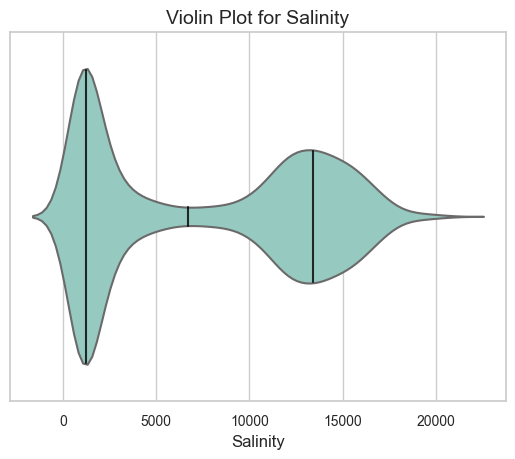

In [402]:
df = pd.read_csv('/Users/avaisman/tmp/DataMisc/ScheldeData/ec_schelde_all.csv')
  
df.head()
df.rename(columns={"Value": "Salinity"}, inplace=True) 
ax= seaborn.violinplot(x=df["Salinity"],  palette="Set3", linestyle='-',
scale="count",density_norm="count", inner="quartile" )
for l in ax.lines:
    l.set_linestyle('-')
    l.set_color('black')
    l.set_alpha(0.8)
ax.axes.set_title("Violin Plot for Salinity",fontsize=14)
ax.set_xlabel("Salinity",fontsize=12)
#ax.set_ylabel("Y Label",fontsize=20)
ax.tick_params(labelsize=10)
fig = ax.get_figure()
fig.savefig("/Users/avaisman/tmp/PythonNotebooks/Figs/violinplot.png")


In [426]:
import altair as alt
from vega_datasets import data
import pandas as pd

source = data.anscombe().copy()
source['line-label'] = 'x=y'
source = pd.concat([source,source.groupby('Series').agg(x_diff=('X','diff'), y_diff=('Y','diff'))],axis=1)
source['rate'] = source.y_diff/source.x_diff
source['rate-label'] = 'line y=x'

import altair as alt
from vega_datasets import data
import pandas as pd

source = data.anscombe().copy()
source['line-label'] = 'x=y'
source = pd.concat([source,source.groupby('Series').agg(x_diff=('X','diff'), y_diff=('Y','diff'))],axis=1)
source['rate'] = source.y_diff/source.x_diff
source['rate-label'] = 'line y=x'

 
source.loc[source['Series']=='I', 'Series'] = 'Dataset I'
source.loc[source['Series']=='II', 'Series'] = 'Dataset II'
source.loc[source['Series']=='III', 'Series'] = 'Dataset III'
source.loc[source['Series']=='IV', 'Series'] = 'Dataset IV'

source_linear = source.groupby(by=['Series']).agg(x_linear=('X','max'), y_linear=('X', 'max')).reset_index().sort_values(by=['Series'])

source_origin = source_linear.copy()
source_origin['y_linear'] = 0
source_origin['x_linear'] = 0

source_linear = pd.concat([source_origin,source_linear]).sort_values(by=['Series'])

source = source.merge(source_linear,on='Series').drop_duplicates()

scatter = alt.Chart(source).mark_circle(size=60, opacity=0.60).encode(
    x='X:Q',
    y='Y:Q' #, color='Series:N'
 #   tooltip=['X','Y','rate']
)


reg= scatter.transform_regression('X','Y').mark_line(strokeDash=[3,3]).encode(
 #shape = alt.Shape('Series:N'),
    color = alt.value('blue')
)

scatterA = (scatter + reg).properties(
    title='') 

alt.layer(scatterA).facet(
  alt.Column( 'Series:N',title=None, header=alt.Header(labelFontSize=12))
).properties(title='Anscombe\'s Quartet', 
    columns=2
).resolve_scale(
    x='independent',
    y='independent'
).configure_title(fontWeight='normal',fontSize=20, anchor='middle')


alt.FacetChart(...)